<a href="https://colab.research.google.com/github/Siddhant-Kumar-Rajput/Projects_B.Tech/blob/main/TrafficSignPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.image as mpimg
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Extracting the compressed dataset.
from zipfile import ZipFile
data_path = '/content/drive/MyDrive/Project 6th SEM/archive.zip'
with ZipFile(data_path, 'r') as zip :
  zip.extractall()


In [ ]:
# path to the folder containing our dataset
dataset = '/content/traffic_Data/DATA'

# path of label file
labelfile = pd.read_csv('labels.csv')


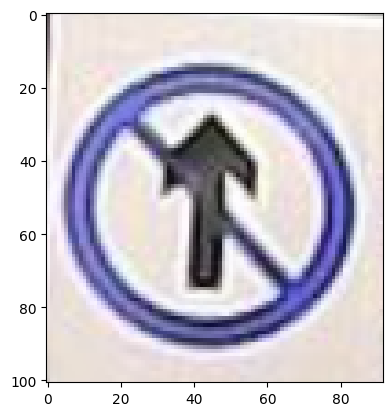

In [ ]:
# Visualize some images from the dataset
img = cv2.imread("/content/traffic_Data/DATA/10/010_0011.png")
plt.imshow(img)


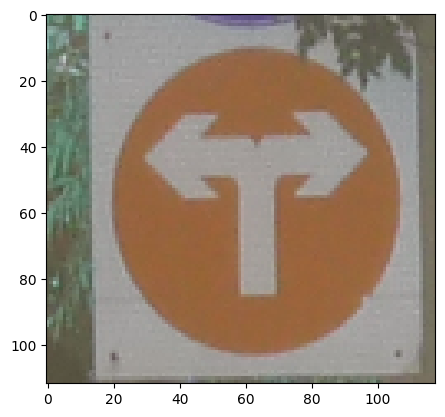

In [ ]:
img = cv2.imread("/content/traffic_Data/DATA/23/023_0001.png")
plt.imshow(img)

In [ ]:
labelfile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [ ]:
labelfile.tail()

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='training',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='validation',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [ ]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
	class_names.append(labelfile['Name'][int(i)])


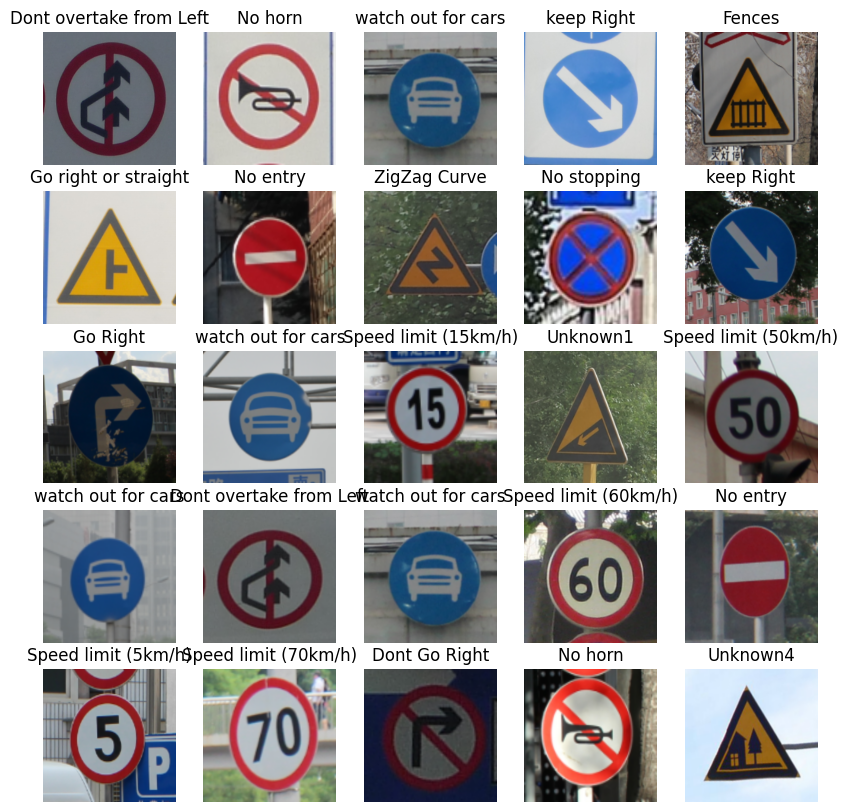

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
	for i in range(25):
		ax = plt.subplot(5, 5, i + 1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")

plt.show()


In [ ]:
data_augmentation = tf.keras.Sequential(
	[
		tf.keras.layers.experimental.preprocessing.RandomFlip(
			"horizontal", input_shape=(224, 224, 3)),
		tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
		tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
		tf.keras.layers.experimental.preprocessing.RandomFlip(
			mode="horizontal_and_vertical")
	]
)


In [ ]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

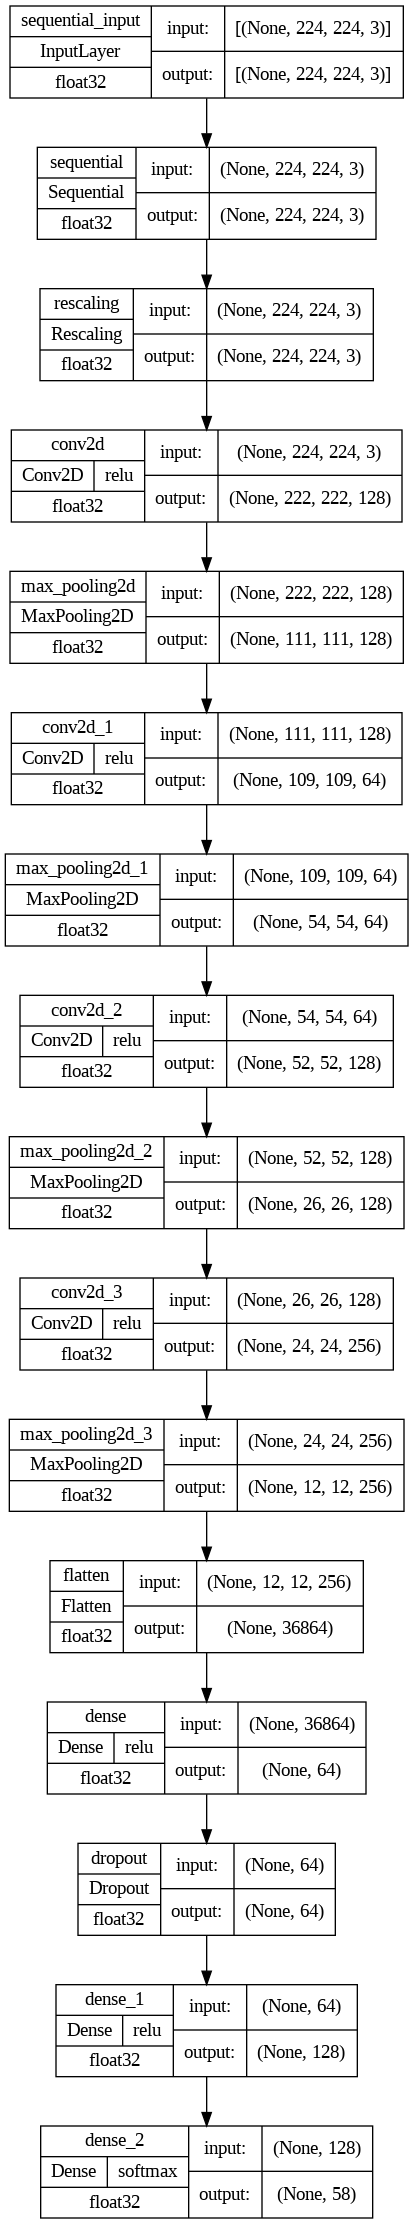

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
			optimizer='adam',
			metrics=['accuracy'])

In [ ]:
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]
history = model.fit(train_ds,
				validation_data=val_ds,
				epochs=50,
				callbacks=mycallbacks)


Epoch 1/50
105/105 [==============================] - 31s 155ms/step - loss: 3.4435 - accuracy: 0.1316 - val_loss: 2.8883 - val_accuracy: 0.2206
Epoch 2/50
105/105 [==============================] - 16s 139ms/step - loss: 2.5046 - accuracy: 0.2968 - val_loss: 1.9791 - val_accuracy: 0.4113
Epoch 3/50
105/105 [==============================] - 14s 133ms/step - loss: 2.0279 - accuracy: 0.3849 - val_loss: 1.6455 - val_accuracy: 0.4568
Epoch 4/50
105/105 [==============================] - 15s 136ms/step - loss: 1.7504 - accuracy: 0.4409 - val_loss: 1.5904 - val_accuracy: 0.5324
Epoch 5/50
105/105 [==============================] - 17s 162ms/step - loss: 1.6245 - accuracy: 0.4757 - val_loss: 1.3682 - val_accuracy: 0.5779
Epoch 6/50
105/105 [==============================] - 18s 167ms/step - loss: 1.5360 - accuracy: 0.4964 - val_loss: 1.2526 - val_accuracy: 0.6259
Epoch 7/50
105/105 [==============================] - 15s 138ms/step - loss: 1.4605 - accuracy: 0.5189 - val_loss: 1.1305 - val_ac

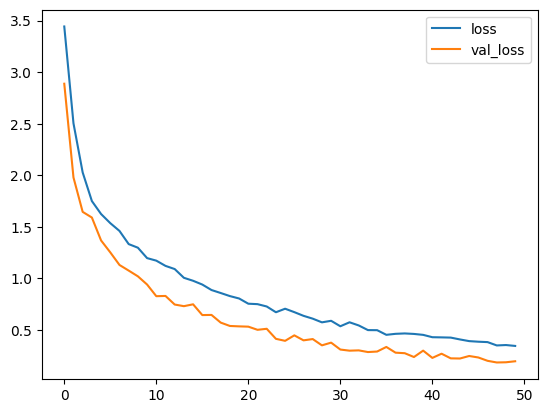

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')



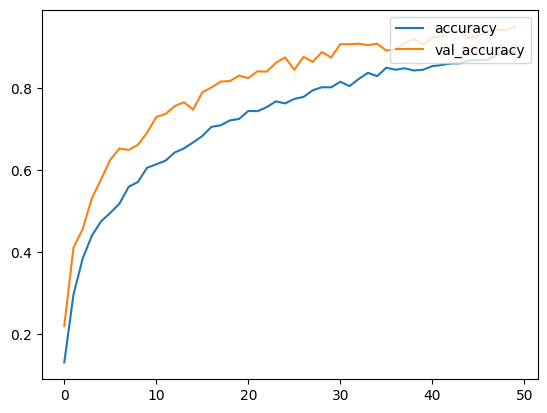

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
import gradio as gr

def predict_image(img):
  img_4d=img.reshape(-1, 224, 224, 3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(58)}




In [ ]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default',
             capture_session= True).launch(debug='True')